Task 1

Web scraping and analysis
This Jupyter notebook includes some code to get you started with web scraping. We will use a package called BeautifulSoup to collect the data from the web. Once you've collected your data and saved it into a local .csv file you should start with your analysis.

Scraping data from Skytrax
If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use Python and BeautifulSoup to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
! pip install pandas
! pip install requests
! pip install BeautifulSoup

In [ ]:
import requests

In [ ]:
url = "https://www.airlinequality.com/airline-reviews/british-airways/?sortby=post_date%3ADesc&pagesize=100"

In [ ]:
response = requests.get(url)
response.status_code

200

In [ ]:
page_content = response.text
len(page_content)

629295

In [ ]:
with open('webpage.html', 'w') as f:
    f.write(page_content)

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
doc = BeautifulSoup(response.text, 'html.parser')
type(doc)

bs4.BeautifulSoup

In [ ]:
doc.find('title')

<title>British Airways Customer Reviews - SKYTRAX</title>

In [ ]:
def get_page(url):
    response = requests.get(url)

    # download was sucessful
    if response.status_code != 200:
        raise Exception('Unable to download page {}'.format(url))

    # Get the page HTML
    page_content = response.text

    doc = BeautifulSoup(response.text, 'html.parser')
    return doc

In [ ]:
doc = get_page(url)

In [ ]:
get_page("https://www.airlinequality.com/airline-reviews/british-airways/?sortby=post_date%3ADesc&pagesize=100")

In [ ]:
tags = doc.find_all('div', {'class': "text_content"})
len(tags)

100

In [ ]:
def get_rev(doc):
    tags = doc.find_all('div', {'class': "text_content"})
    return [tag.text.strip() for tag in tags]

In [ ]:
reviews = get_rev(doc)
len(reviews)
reviews[:3]

['✅ Trip Verified |  Couldn’t book in online. Arrived at check in to find we had been bumped off due to overselling. No BA staff available. Very helpful Gatwick staff got us a bus to LHR and a flight to Toulouse. Had knock in effect on our car booking and sharing as the rest of family had been able yo board original flight. Airlines should be legally stopped from selling seats twice.',
 '✅ Trip Verified | London Heathrow to Mumbai in a Boeing 787-8 in Business Class. The lounge near Terminal 5, Gate B36 at Heathrow was outstanding in its service and offerings. It provides us just the right frame to relax in before boarding as the departure was delayed by almost 2 hours. The 787-8 on our flight featured the older Club World seating. Not the best in class but comfortable enough. I hear that the new Club Suites configuration is far superior. British Airways onboard service was outstanding in every respect. All in all, a very comfortable flight. One minor irritant: for some reason this air

In [ ]:
def get_user(doc):
    users = doc.find_all('span', {'itemprop': "name"})
    return [user.text.strip() for user in users]

In [ ]:
users1 = get_user(doc)
len(users1)

100

In [ ]:
users1[:6]

['Alison Spencer',
 'Rajan Parrikar',
 'Rajan Parrikar',
 'Andrew Peachey',
 'Alwaleed Althani',
 'Jonathan Hock']

In [ ]:
import pandas as pd

In [ ]:
data = {
    'user': users1,
    'review': reviews
}

In [ ]:
pd.DataFrame(data)

,user,review
0,Alison Spencer,✅ Trip Verified | Couldn’t book in online. Ar...
1,Rajan Parrikar,✅ Trip Verified | London Heathrow to Mumbai in...
2,Rajan Parrikar,"✅ Trip Verified | Keflavík, Iceland to London ..."
3,Andrew Peachey,✅ Trip Verified | Terrible Experience with Bri...
4,Alwaleed Althani,✅ Trip Verified | An airline that lives in the...
...,...,...
95,P Jones,✅ Trip Verified | Why do you make it so hard? ...
96,Colean Wright,✅ Trip Verified | After several delays and ca...
97,Andrew Fitch,Not Verified | Literally the worst flight of ...
98,Andy Magowan,✅ Trip Verified | I swore I would never fly B...


In [ ]:
dataframe = pd.DataFrame(data)


In [ ]:
pip install top2vec

In [ ]:
def get_pagenumber(page_number):
    url = "https://www.airlinequality.com/airline-reviews/british-airways/page/" + str(page_number) + "/?sortby=post_date%3ADesc&pagesize=100"
    doc = get_page(url)
    users1 = get_user(doc)
    reviews = get_rev(doc)
    return users1 , reviews


In [ ]:
from time import sleep

In [ ]:
all_users1, all_reviews = [], []

for page_number in range(1,10):
    print('Downloading page number', page_number)
    users1 , reviews = get_pagenumber(page_number)
    all_users1 += users1
    all_reviews += reviews
    sleep(1)

In [ ]:
all_pages = {
    'users': all_users1,
    'reviews': all_reviews,
}

In [ ]:
dataframe = pd.DataFrame(all_pages)
dataframe

,users,reviews
0,Alison Spencer,✅ Trip Verified | Couldn’t book in online. Ar...
1,Rajan Parrikar,✅ Trip Verified | London Heathrow to Mumbai in...
2,Rajan Parrikar,"✅ Trip Verified | Keflavík, Iceland to London ..."
3,Andrew Peachey,✅ Trip Verified | Terrible Experience with Bri...
4,Alwaleed Althani,✅ Trip Verified | An airline that lives in the...
...,...,...
895,D Thomas,✅ Trip Verified | New York to London via Genev...
896,David Ellis,✅ Trip Verified | A380 boarding is always a ni...
897,David Ellis,✅ Trip Verified | \r\nThe 2-3-2 seating in the...
898,E Smyth,✅ Trip Verified | London to Johannesburg. Smo...


Removing the parts before | in the reviews column

In [ ]:
dataframe.reviews= dataframe.reviews.str.split('|',expand=True)[1]


In [ ]:
dataframe

,users,reviews
0,Alison Spencer,Couldn’t book in online. Arrived at check in...
1,Rajan Parrikar,London Heathrow to Mumbai in a Boeing 787-8 i...
2,Rajan Parrikar,"Keflavík, Iceland to London Heathrow on an A3..."
3,Andrew Peachey,Terrible Experience with British Airways. I b...
4,Alwaleed Althani,An airline that lives in their past glory and...
...,...,...
895,D Thomas,New York to London via Geneva with British Ai...
896,David Ellis,"A380 boarding is always a nightmare, but it w..."
897,David Ellis,\r\nThe 2-3-2 seating in the front section of...
898,E Smyth,London to Johannesburg. Smooth check in via ...


Data preprocessing steps:

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

Step 1: Cleaning the text

In [ ]:
import re
def clean(text):
# Removes all special characters and numericals
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text
dataframe['Reviews'] = dataframe['reviews'].apply(clean)
dataframe.head()


,users,reviews,Reviews
0,Alison Spencer,Couldn’t book in online. Arrived at check in...,Couldn t book in online Arrived at check in t...
1,Rajan Parrikar,London Heathrow to Mumbai in a Boeing 787-8 i...,London Heathrow to Mumbai in a Boeing in Busi...
2,Rajan Parrikar,"Keflavík, Iceland to London Heathrow on an A3...",Keflav k Iceland to London Heathrow on an A i...
3,Andrew Peachey,Terrible Experience with British Airways. I b...,Terrible Experience with British Airways I bo...
4,Alwaleed Althani,An airline that lives in their past glory and...,An airline that lives in their past glory and...


Step 2: Tokenization
Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

Step 3: Enrichment – POS tagging
Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

Step 4: Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

Step 5: Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

NLTK is a leading platform for building Python programs to work with human language data.

It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along
with a suite of text processing libraries for classification, tokenization, stemming, tagging,
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

In [ ]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

dataframe['POS tagged'] = dataframe['Reviews'].apply(token_stop_pos)


In [ ]:
dataframe.head()

,users,reviews,Reviews,POS tagged
0,Alison Spencer,Couldn’t book in online. Arrived at check in...,Couldn t book in online Arrived at check in t...,"[(book, n), (online, n), (Arrived, v), (check,..."
1,Rajan Parrikar,London Heathrow to Mumbai in a Boeing 787-8 i...,London Heathrow to Mumbai in a Boeing in Busi...,"[(London, n), (Heathrow, n), (Mumbai, n), (Boe..."
2,Rajan Parrikar,"Keflavík, Iceland to London Heathrow on an A3...",Keflav k Iceland to London Heathrow on an A i...,"[(Keflav, n), (k, n), (Iceland, n), (London, n..."
3,Andrew Peachey,Terrible Experience with British Airways. I b...,Terrible Experience with British Airways I bo...,"[(Terrible, a), (Experience, n), (British, a),..."
4,Alwaleed Althani,An airline that lives in their past glory and...,An airline that lives in their past glory and...,"[(airline, n), (lives, v), (past, a), (glory, ..."


In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

dataframe['Lemma'] = dataframe['POS tagged'].apply(lemmatize)
dataframe.head()

,users,reviews,Reviews,POS tagged,Lemma
0,Alison Spencer,Couldn’t book in online. Arrived at check in...,Couldn t book in online Arrived at check in t...,"[(book, n), (online, n), (Arrived, v), (check,...",book online Arrived check find bump due over...
1,Rajan Parrikar,London Heathrow to Mumbai in a Boeing 787-8 i...,London Heathrow to Mumbai in a Boeing in Busi...,"[(London, n), (Heathrow, n), (Mumbai, n), (Boe...",London Heathrow Mumbai Boeing Business Class...
2,Rajan Parrikar,"Keflavík, Iceland to London Heathrow on an A3...",Keflav k Iceland to London Heathrow on an A i...,"[(Keflav, n), (k, n), (Iceland, n), (London, n...",Keflav k Iceland London Heathrow Business Cl...
3,Andrew Peachey,Terrible Experience with British Airways. I b...,Terrible Experience with British Airways I bo...,"[(Terrible, a), (Experience, n), (British, a),...",Terrible Experience British Airways book fli...
4,Alwaleed Althani,An airline that lives in their past glory and...,An airline that lives in their past glory and...,"[(airline, n), (lives, v), (past, a), (glory, ...",airline live past glory head future crisis B...


In [ ]:
dataframe[['reviews','Lemma']]


,reviews,Lemma
0,Couldn’t book in online. Arrived at check in...,book online Arrived check find bump due over...
1,London Heathrow to Mumbai in a Boeing 787-8 i...,London Heathrow Mumbai Boeing Business Class...
2,"Keflavík, Iceland to London Heathrow on an A3...",Keflav k Iceland London Heathrow Business Cl...
3,Terrible Experience with British Airways. I b...,Terrible Experience British Airways book fli...
4,An airline that lives in their past glory and...,airline live past glory head future crisis B...
...,...,...
895,New York to London via Geneva with British Ai...,New York London via Geneva British Airways p...
896,"A380 boarding is always a nightmare, but it w...",boarding always nightmare complicate occasio...
897,\r\nThe 2-3-2 seating in the front section of...,seating front section Club World upper deck ...
898,London to Johannesburg. Smooth check in via ...,London Johannesburg Smooth check via Club Wo...


Sentiment Analysis using VADER

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

dataframe['Sentiment'] = dataframe['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
dataframe['Analysis'] = dataframe['Sentiment'].apply(vader_analysis)
dataframe.head()

,users,reviews,Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Alison Spencer,Couldn’t book in online. Arrived at check in...,Couldn t book in online Arrived at check in t...,"[('book', 'n'), ('online', 'n'), ('Arrived', '...",book online Arrived check find bump due over...,0.6486,Positive
1,Rajan Parrikar,London Heathrow to Mumbai in a Boeing 787-8 i...,London Heathrow to Mumbai in a Boeing in Busi...,"[('London', 'n'), ('Heathrow', 'n'), ('Mumbai'...",London Heathrow Mumbai Boeing Business Class...,0.9781,Positive
2,Rajan Parrikar,"Keflavík, Iceland to London Heathrow on an A3...",Keflav k Iceland to London Heathrow on an A i...,"[('Keflav', 'n'), ('k', 'n'), ('Iceland', 'n')...",Keflav k Iceland London Heathrow Business Cl...,-0.0258,Negative
3,Andrew Peachey,Terrible Experience with British Airways. I b...,Terrible Experience with British Airways I bo...,"[('Terrible', 'a'), ('Experience', 'n'), ('Bri...",Terrible Experience British Airways book fli...,0.8698,Positive
4,Alwaleed Althani,An airline that lives in their past glory and...,An airline that lives in their past glory and...,"[('airline', 'n'), ('lives', 'v'), ('past', 'a...",airline live past glory head future crisis B...,-0.7351,Negative


In [ ]:
vader_counts = dataframe['Analysis'].value_counts()
vader_counts

Positive    447
Negative    357
Neutral      96
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7ad11f8463b0>,
 [Text(0.01151895154293339, 1.0999396864171016, 'Positive'),
  Text(-0.3726116618814168, -1.0349688639905883, 'Negative'),
  Text(1.038814038195633, -0.3617532225809217, 'Neutral')],
 [Text(0.006283064477963667, 0.5999671016820554, '49.7%'),
  Text(-0.20324272466259097, -0.5645284712675935, '39.7%'),
  Text(0.5666258390157998, -0.19731993958959362, '10.7%')])

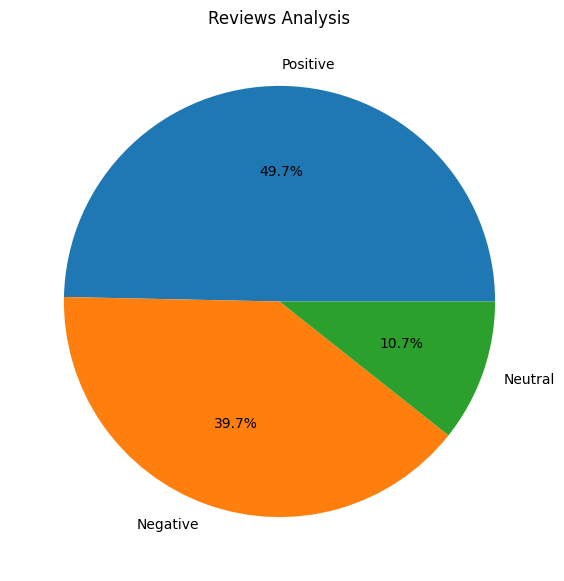

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index , autopct='%1.1f%%')

In [ ]:
!pip install top2vec[sentence_encoders]

In [ ]:
from top2vec import Top2Vec

In [ ]:
model = Top2Vec(list(dataframe["Lemma"].to_numpy()))

2023-07-31 11:38:23,850 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-07-31 11:38:24,218 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-07-31 11:38:28,079 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-07-31 11:38:37,392 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-07-31 11:38:37,422 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [ ]:
model.get_num_topics()

2

In [ ]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [ ]:
topic_words, word_scores, topic_nums = model.get_topics(2)
topic_sizes, topic_nums, topic_words

(array([855,  45]),
 array([0, 1]),
 array([['ground', 'order', 'new', 'way', 'sit', 'choose', 'least',
         'nice', 'free', 'see', 'three', 'arrival', 'almost', 'pleasant',
         'london', 'problem', 'start', 'terrible', 'fine', 'room',
         'really', 'mean', 'show', 'expect', 'middle', 'option', 'ever',
         'covid', 'queue', 'rather', 'gate', 'heathrow', 'thing', 'think',
         'baggage', 'take', 'serve', 'haul', 'selection', 'half',
         'airline', 'many', 'keep', 'best', 'little', 'premium', 'minute',
         'front', 'available', 'product'],
        ['th', 'voucher', 'find', 'hotel', 'send', 'call', 'luggage',
         'us', 'day', 'week', 'refund', 'phone', 'change', 'airport',
         'club', 'tell', 'book', 'claim', 'money', 'website', 'say',
         'email', 'ticket', 'since', 'finally', 'close', 'try', 'number',
         'min', 'contact', 'lose', 'cancel', 'different', 'go', 'never',
         'would', 'help', 'another', 'excellent', 'cabin', 'request

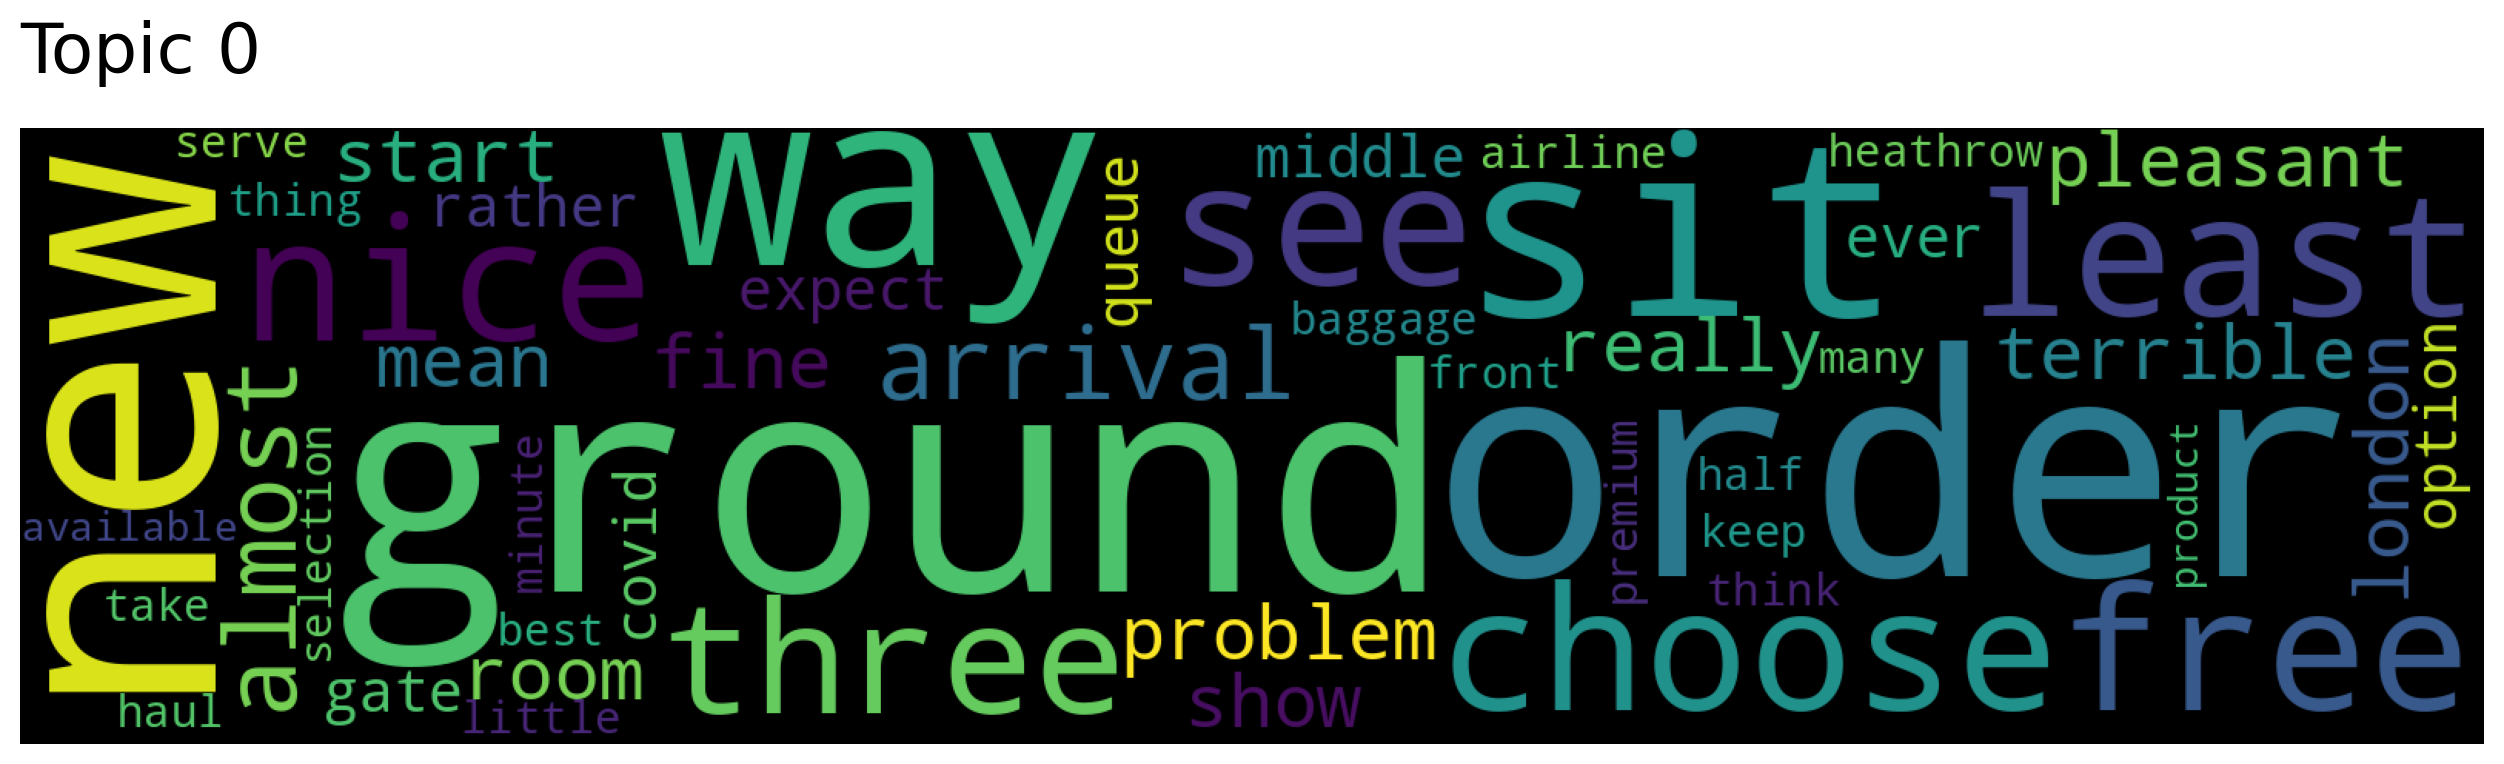

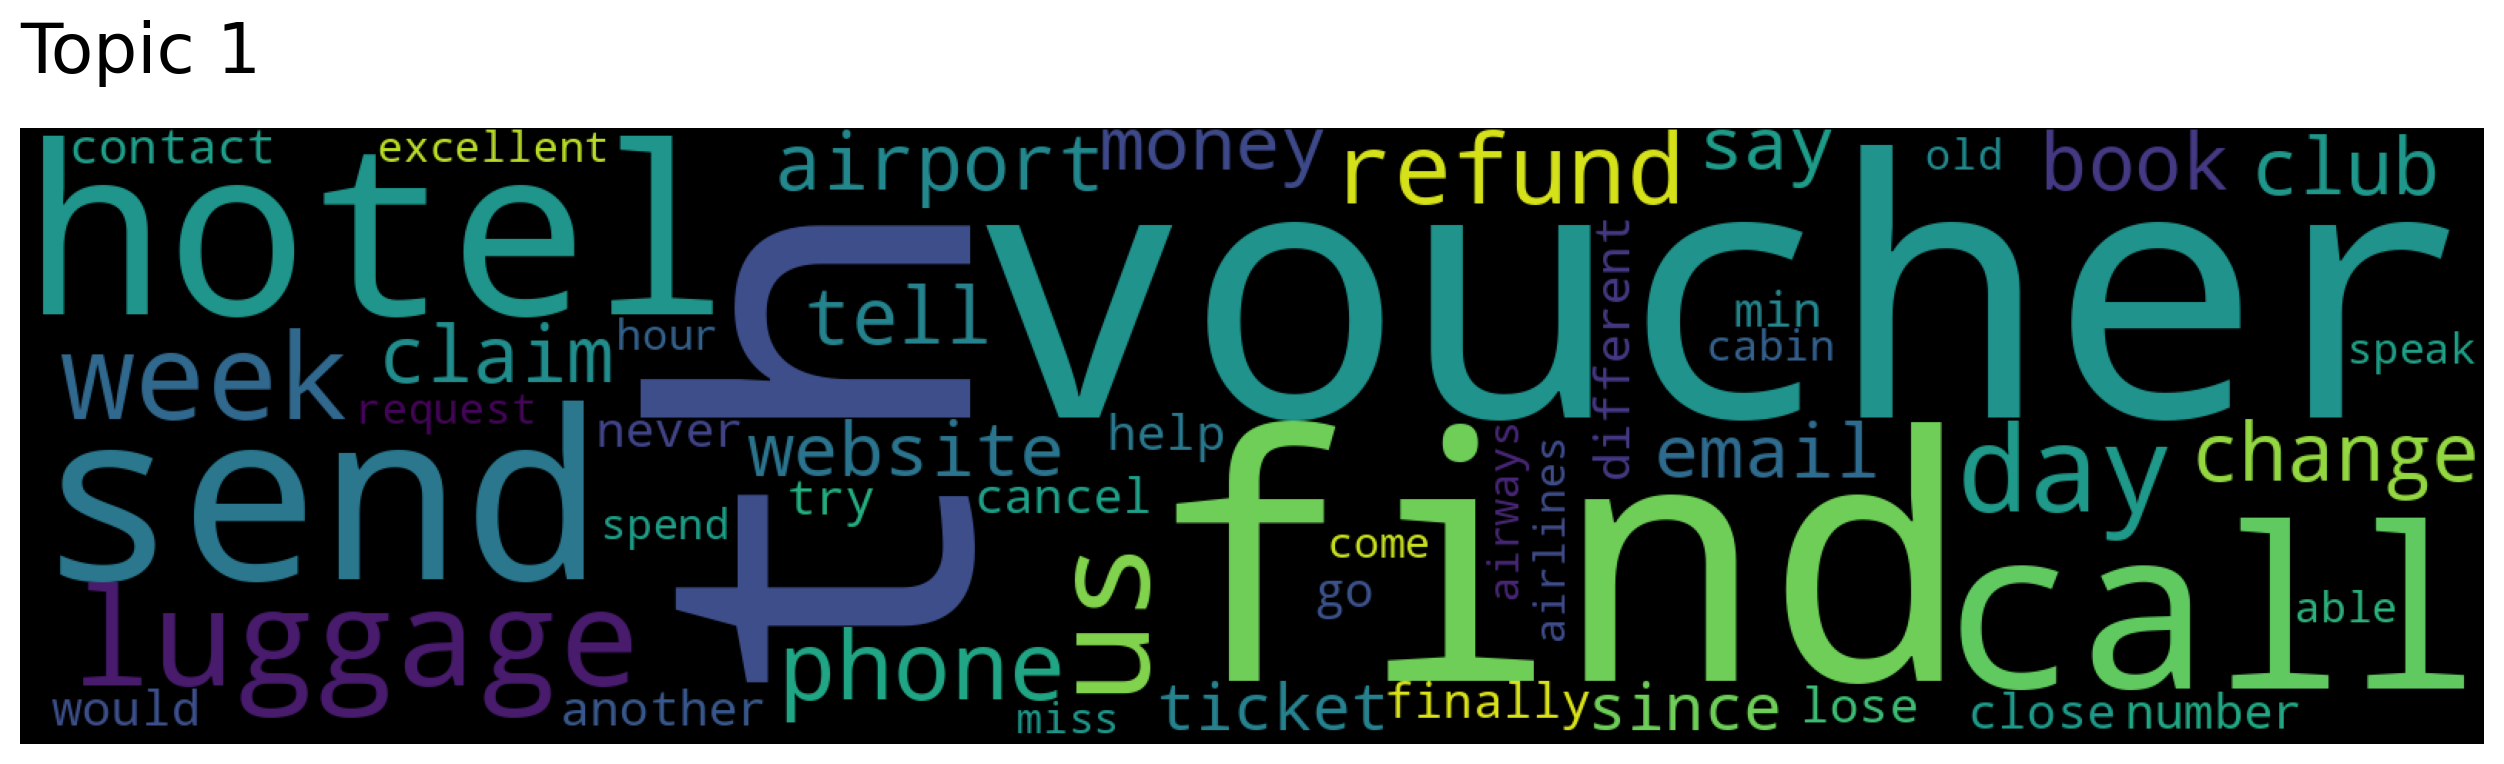

In [ ]:
for topic in topic_nums[0:2]:
    model.generate_topic_wordcloud(topic)

For topics related to professional

In [ ]:
words, word_scores = model.similar_words(keywords=["professional"], keywords_neg=[], num_words=10)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

well 0.9924903365747946
clean 0.9914777594614391
front 0.991404628743445
fine 0.9913766633775052
serve 0.9903059437803122
expect 0.9900713528833132
offer 0.989908423698235
although 0.9895326485328519
land 0.9891841938335508
much 0.9890896879289179


For reviews related to professional

In [ ]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["professional"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 418, Score: 0.9922254681587219
-----------
  plane clean air quality good Timing perfect seat K begin difficulty use button get leg rest well push back seat request cup tea drink service start tell tea would serve dinner press loght twice indicate need nothing happen dinner tea service get go galley ask cup tea hand soap washroom However way London Toronto experience good one However return flight
-----------

Document: 758, Score: 0.9912120699882507
-----------
  New York Glasgow via London routine smooth overnight flight depart gate minute late security issue terminal electronic boarding pas BA app announcement make need get paper version separate desk couple agent perform task pilot introduce flight attendant gorgeous come across inappropriate would prefer efficient even helpful describe aisle seat seat layout middle seat unoccupied Enough leg space storage space overhead good collection sort movie free headphone provide IFE system easy use drink service precede meal servi

Task 2 - Predict customer buying behaviour

In [ ]:

import os, types
import pandas as pd

df_data_0 = pd.read_excel(data)
df_data_0.head()



,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


In [ ]:
booking = df_data_0

In [ ]:
booking.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [ ]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Standard Libraries
import pandas as pd
import numpy as np
import os

# For visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data-Prep
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Model Buidling and metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
booking.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [ ]:
# Separating categorical and numerical columns
booking_categorical = booking.select_dtypes(include="object")
booking_numerical = booking.select_dtypes(exclude="object")

In [ ]:
booking_categorical.head()

,sales_channel,trip_type,flight_day,route,booking_origin
0,Internet,RoundTrip,Sat,AKLDEL,New Zealand
1,Internet,RoundTrip,Sat,AKLDEL,New Zealand
2,Internet,RoundTrip,Wed,AKLDEL,India
3,Internet,RoundTrip,Sat,AKLDEL,New Zealand
4,Internet,RoundTrip,Wed,AKLDEL,India


In [ ]:
for col in booking_categorical:
    print(booking_categorical[col].value_counts())
    print("\n")

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64


RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64


Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: flight_day, dtype: int64


AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64


Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64




In [ ]:
booking_categorical.columns

Index(['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], dtype='object')

In [ ]:
columns = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
for value in columns:
    booking_categorical=pd.get_dummies(booking_categorical, columns=[value],drop_first=True)

In [ ]:
booking_categorical.shape

(50000, 910)

In [ ]:
booking_categorical.head()

,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,route_AKLHGH,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
booking_numerical.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,262,19,7,1,0,0,5.52,0
1,1,112,20,3,0,0,0,5.52,0
2,2,243,22,17,1,1,0,5.52,0
3,1,96,31,4,0,0,1,5.52,0
4,2,68,22,15,1,0,1,5.52,0


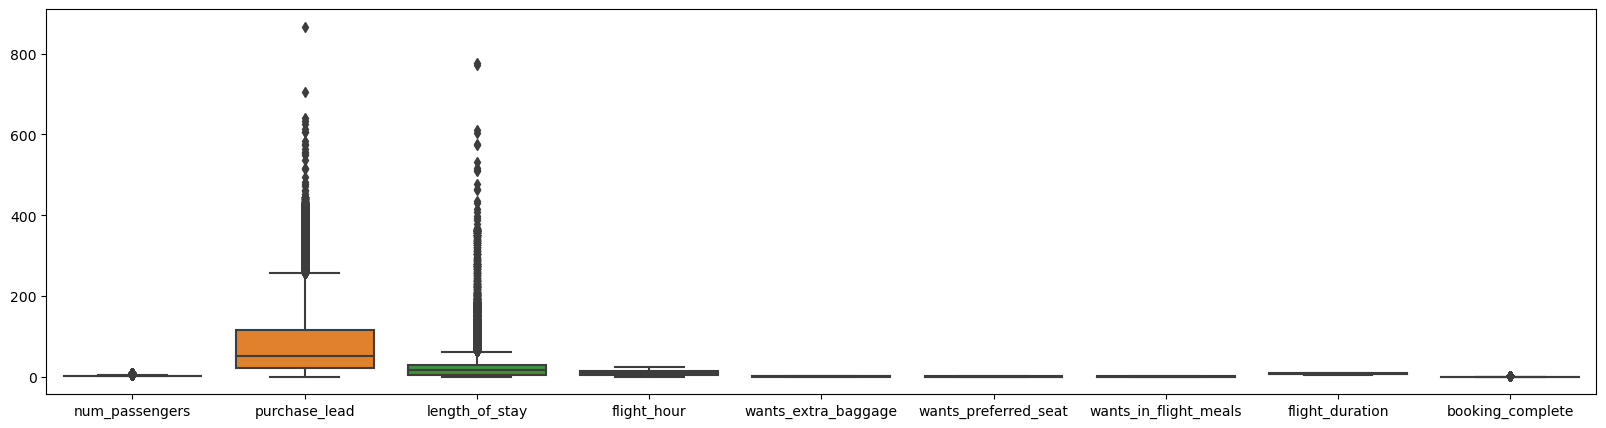

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(data = booking_numerical)
plt.show()

In [ ]:
booking_numerical.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration', 'booking_complete'],
      dtype='object')

In [ ]:
# Replacing outliers with median
#function to return a list of index of outliers
column_list = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration']
for feature in column_list:
    Q1= booking_numerical[feature].quantile(0.25)
    Q3 =booking_numerical[feature].quantile(0.75)
    IQR = Q3 - Q1


    lower_limit = Q1 - 1.5 * IQR

    upper_limit = Q3 + 1.5 * IQR

    median = booking_numerical[feature].median()

    booking_numerical[feature] = np.where(booking_numerical[feature]< lower_limit, median,booking_numerical[feature])
    booking_numerical[feature] = np.where(booking_numerical[feature]> upper_limit, median,booking_numerical[feature])

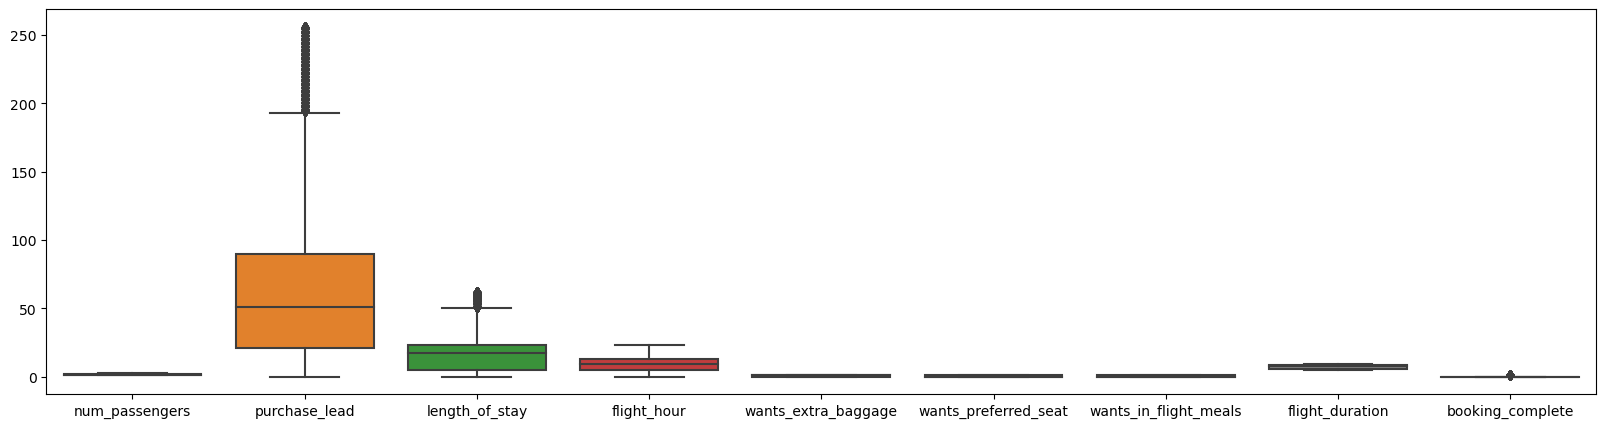

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(data = booking_numerical)
plt.show()

In [ ]:
booking_numerical.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2.0,51.0,19.0,7.0,1.0,0.0,0.0,5.52,0
1,1.0,112.0,20.0,3.0,0.0,0.0,0.0,5.52,0
2,2.0,243.0,22.0,17.0,1.0,1.0,0.0,5.52,0
3,1.0,96.0,31.0,4.0,0.0,0.0,1.0,5.52,0
4,2.0,68.0,22.0,15.0,1.0,0.0,1.0,5.52,0


In [ ]:
# combining numerical and categorical column data
bookings = pd.concat([booking_categorical,booking_numerical] , axis =1)

In [ ]:
bookings.head()

,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,route_AKLHGH,...,booking_origin_Vietnam,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0,0,1,0,1,0,0,0,0,0,...,0,2.0,51.0,19.0,7.0,1.0,0.0,0.0,5.52,0
1,0,0,1,0,1,0,0,0,0,0,...,0,1.0,112.0,20.0,3.0,0.0,0.0,0.0,5.52,0
2,0,0,1,0,0,0,0,0,1,0,...,0,2.0,243.0,22.0,17.0,1.0,1.0,0.0,5.52,0
3,0,0,1,0,1,0,0,0,0,0,...,0,1.0,96.0,31.0,4.0,0.0,0.0,1.0,5.52,0
4,0,0,1,0,0,0,0,0,1,0,...,0,2.0,68.0,22.0,15.0,1.0,0.0,1.0,5.52,0


In [ ]:
# Separating dependent and independent variables
X = bookings.drop(["booking_complete"] , axis=1)
y = bookings["booking_complete"]

In [ ]:
# Using StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [ ]:
X_scaled = pd.DataFrame(X_scaled)

In [ ]:
X_scaled

,0,1,2,3,4,5,6,7,8,9,...,908,909,910,911,912,913,914,915,916,917
0,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,1.056055,-0.246182,0.231165,-0.381764,0.703747,-0.649919,-0.863497,-1.174175
1,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,-0.630179,0.767907,0.305232,-1.120780,-1.420965,-0.649919,-0.863497,-1.174175
2,-0.355785,-0.08832,0.100808,-0.439744,-0.362669,-0.388399,-0.417577,-0.425769,2.348512,-0.004472,...,-0.004472,-0.088435,1.056055,2.945705,0.453365,1.465775,0.703747,1.538654,-0.863497,-1.174175
3,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,-0.630179,0.501916,1.119966,-0.936026,-1.420965,-0.649919,1.158082,-1.174175
4,-0.355785,-0.08832,0.100808,-0.439744,-0.362669,-0.388399,-0.417577,-0.425769,2.348512,-0.004472,...,-0.004472,-0.088435,1.056055,0.036433,0.453365,1.096267,0.703747,-0.649919,1.158082,-1.174175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,1.056055,-0.645168,-0.731702,-0.012257,0.703747,-0.649919,1.158082,-1.107368
49996,-0.355785,-0.08832,0.100808,-0.439744,-0.362669,2.574671,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,-0.630179,0.751282,-0.731702,-0.936026,-1.420965,-0.649919,-0.863497,-1.107368
49997,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,-0.630179,-0.695041,-0.731702,2.389544,-1.420965,-0.649919,1.158082,-1.107368
49998,-0.355785,-0.08832,0.100808,2.274053,-0.362669,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,-0.630179,-0.844661,-0.731702,0.357251,0.703747,-0.649919,1.158082,-1.107368


In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: booking_complete, Length: 50000, dtype: int64

In [ ]:
y.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [ ]:
print(X.shape)
print(y.shape)

(50000, 918)
(50000,)


In [ ]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X_scaled, y)
print(x_smote.shape)
print(y_smote.shape)

(85044, 918)
(85044,)


In [ ]:
x_smote.head()

,0,1,2,3,4,5,6,7,8,9,...,908,909,910,911,912,913,914,915,916,917
0,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,1.056055,-0.246182,0.231165,-0.381764,0.703747,-0.649919,-0.863497,-1.174175
1,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,-0.630179,0.767907,0.305232,-1.120780,-1.420965,-0.649919,-0.863497,-1.174175
2,-0.355785,-0.08832,0.100808,-0.439744,-0.362669,-0.388399,-0.417577,-0.425769,2.348512,-0.004472,...,-0.004472,-0.088435,1.056055,2.945705,0.453365,1.465775,0.703747,1.538654,-0.863497,-1.174175
3,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,-0.630179,0.501916,1.119966,-0.936026,-1.420965,-0.649919,1.158082,-1.174175
4,-0.355785,-0.08832,0.100808,-0.439744,-0.362669,-0.388399,-0.417577,-0.425769,2.348512,-0.004472,...,-0.004472,-0.088435,1.056055,0.036433,0.453365,1.096267,0.703747,-0.649919,1.158082,-1.174175


In [ ]:
y_smote.head()

0    0
1    0
2    0
3    0
4    0
Name: booking_complete, dtype: int64

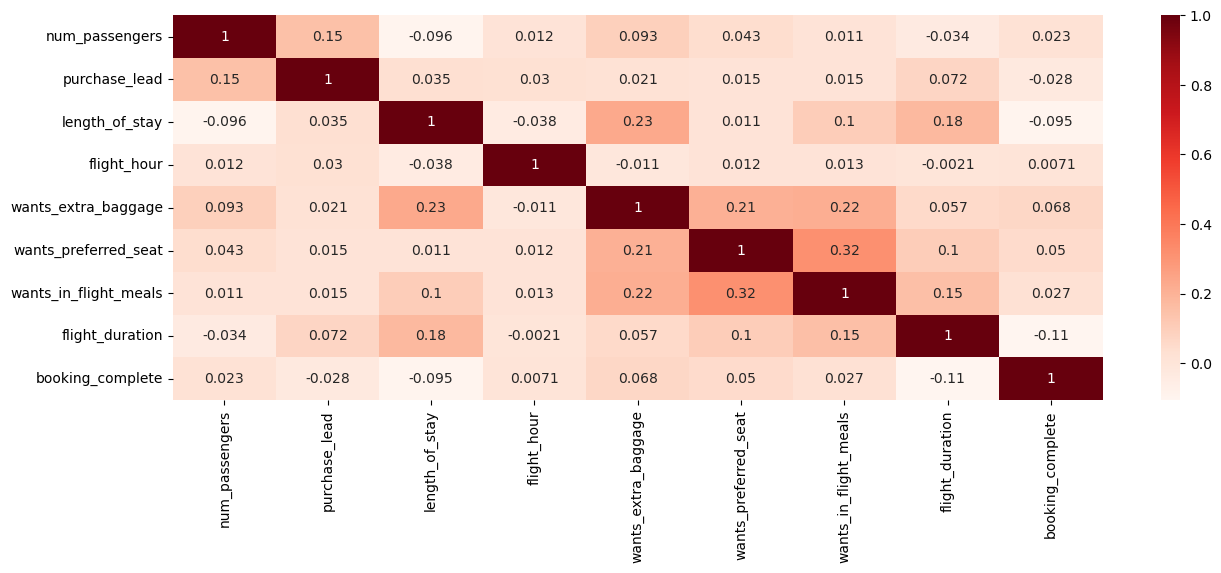

In [ ]:
# Plotting heatmap
plt.figure(figsize=(15,5))
sns.heatmap(booking_numerical.corr() , annot=True, cmap="Reds")
plt.show()

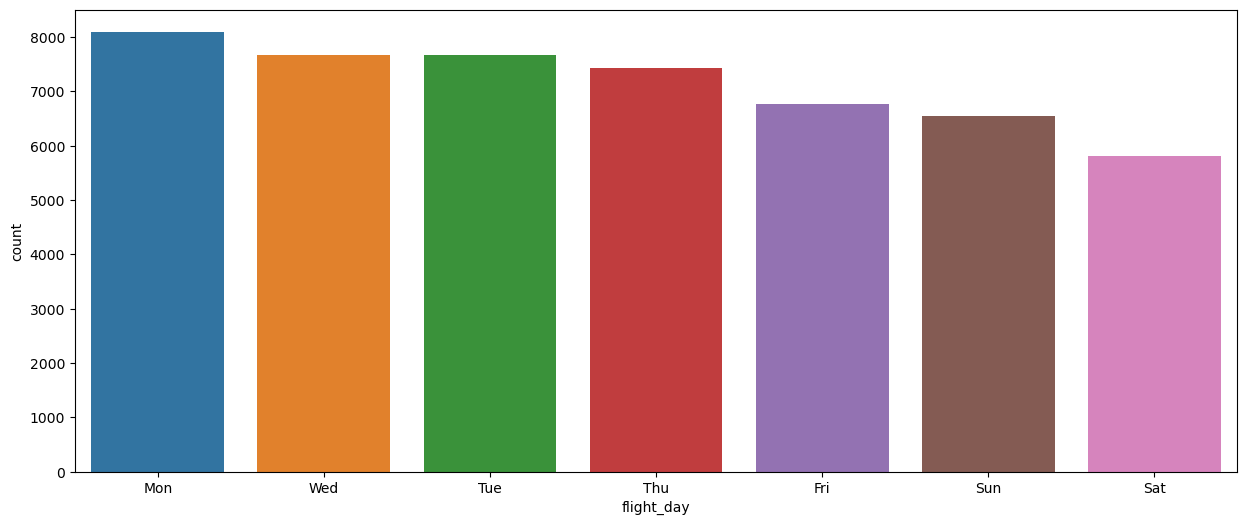

In [ ]:
# No. of flights on each day of the week
plt.figure(figsize=(15,6))
sns.countplot(x = "flight_day", data=booking, order=booking["flight_day"].value_counts().index)
plt.show()

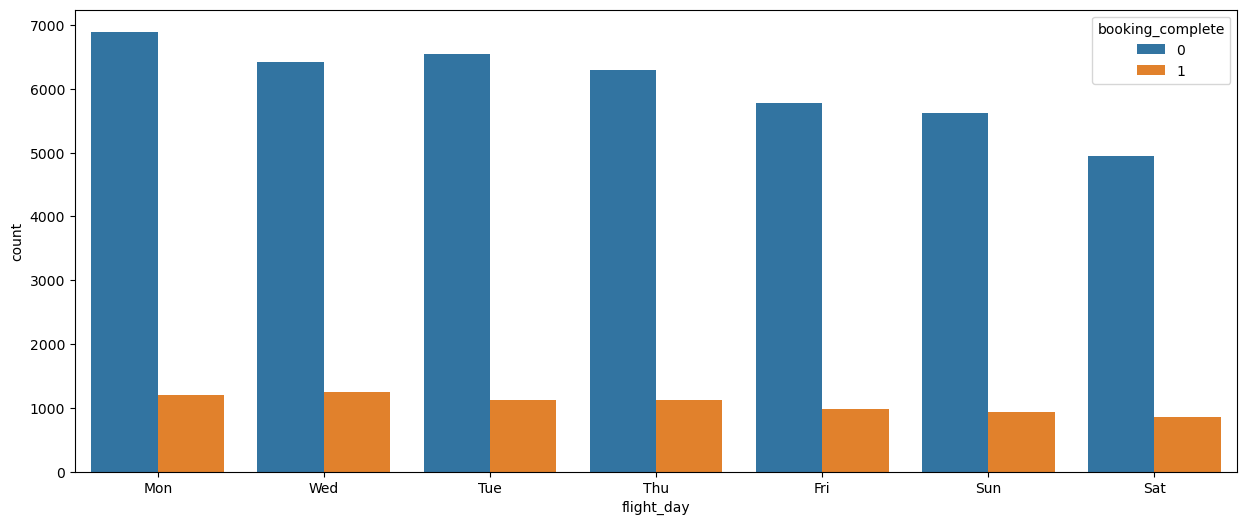

In [ ]:
# No. of flights on each day of the week
plt.figure(figsize=(15,6))
sns.countplot(x = "flight_day",hue = "booking_complete", data=booking, order=booking["flight_day"].value_counts().index)
plt.show()

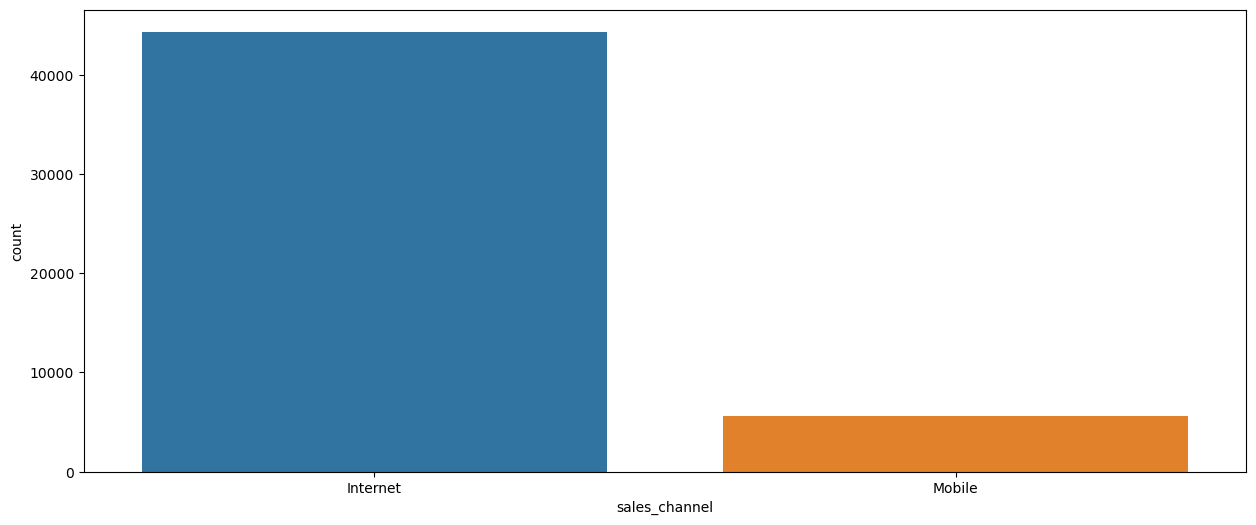

In [ ]:
# Frequently used Booking channel
plt.figure(figsize=(15,6))
sns.countplot(x = "sales_channel", data=booking, order=booking["sales_channel"].value_counts().index)
plt.show()

Text(0, 0.5, 'Count')

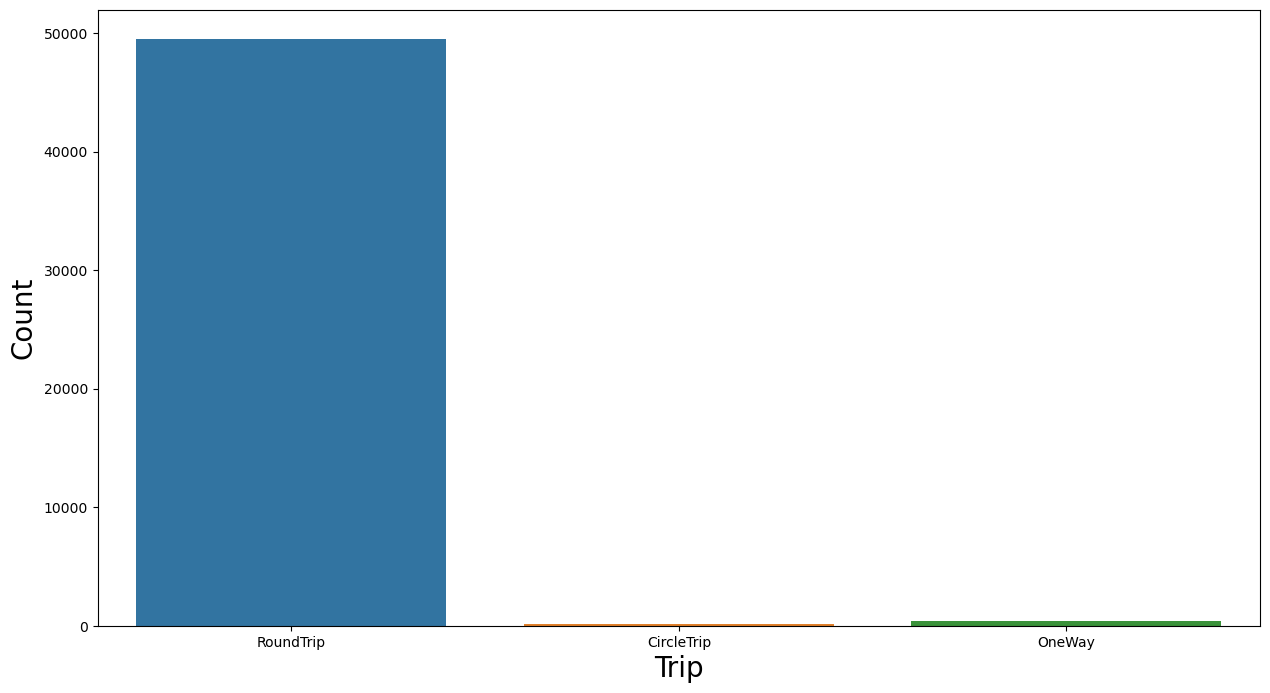

In [ ]:
# Most frequently opted trip type
plt.figure(figsize=(15,8))
plots = sns.countplot(x="trip_type",  data=booking)
plt.xlabel("Trip",fontsize= 20)
plt.ylabel("Count", fontsize= 20)

In [ ]:
booking["booking_origin"].value_counts(ascending=False)

Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

Text(0, 0.5, 'Count')

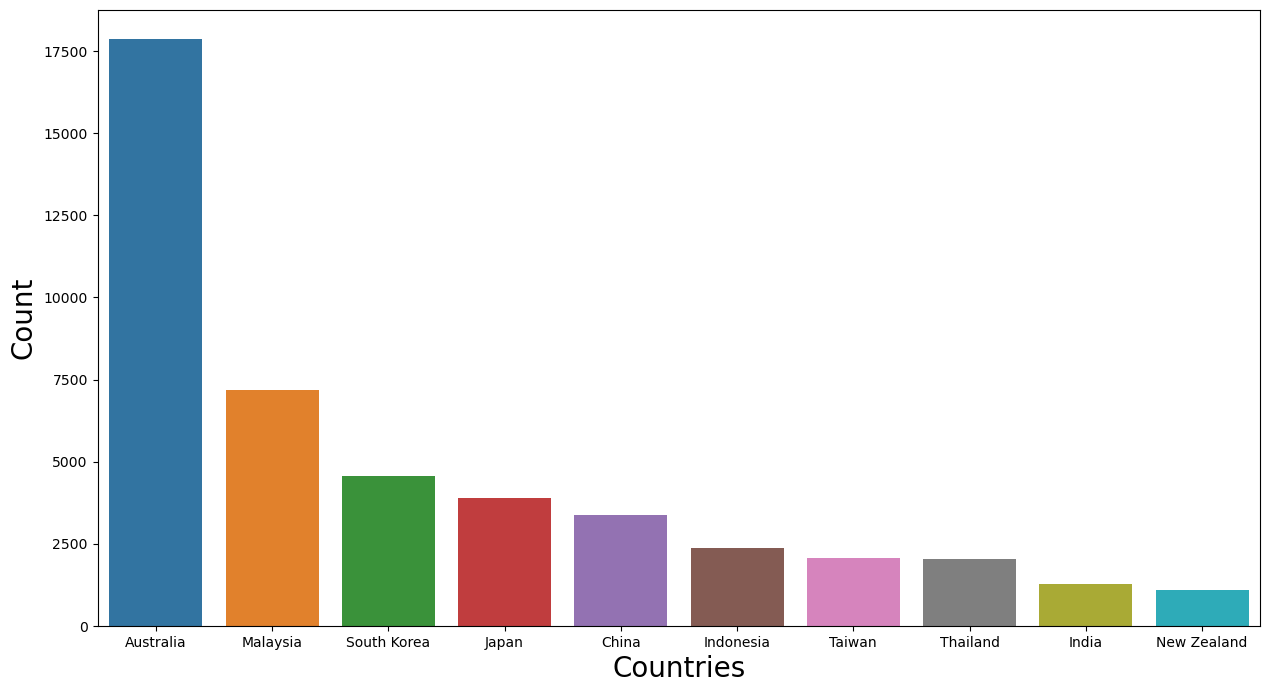

In [ ]:
# Top 10 Countries in flight bookings
plt.figure(figsize=(15,8))
plots = sns.countplot(x="booking_origin",  data=booking ,order=booking.booking_origin.value_counts().iloc[:10].index)
plt.xlabel("Countries",fontsize= 20)
plt.ylabel("Count", fontsize= 20)

Text(0, 0.5, 'Count')

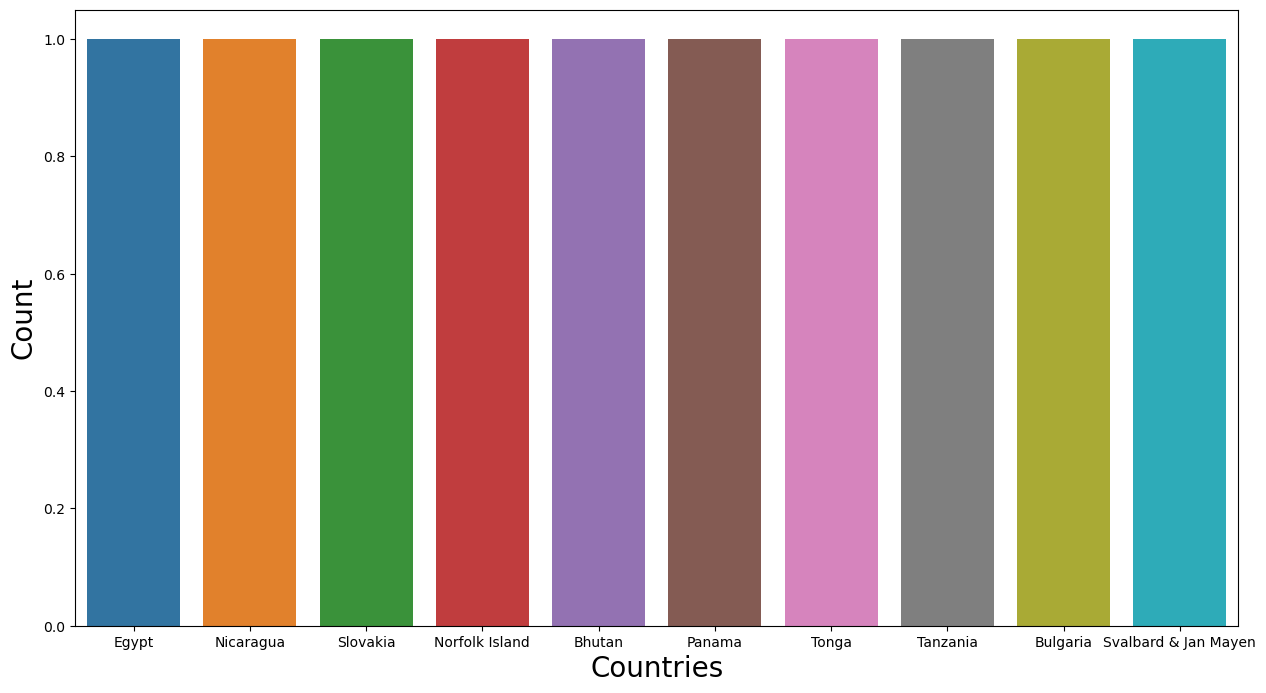

In [ ]:
# Bottom 10 Countries in flight bookings
plt.figure(figsize=(15,8))
plots = sns.countplot(x="booking_origin",  data=booking ,order=booking.booking_origin.value_counts().iloc[-10:].index)
plt.xlabel("Countries",fontsize= 20)
plt.ylabel("Count", fontsize= 20)

Text(0, 0.5, 'Count')

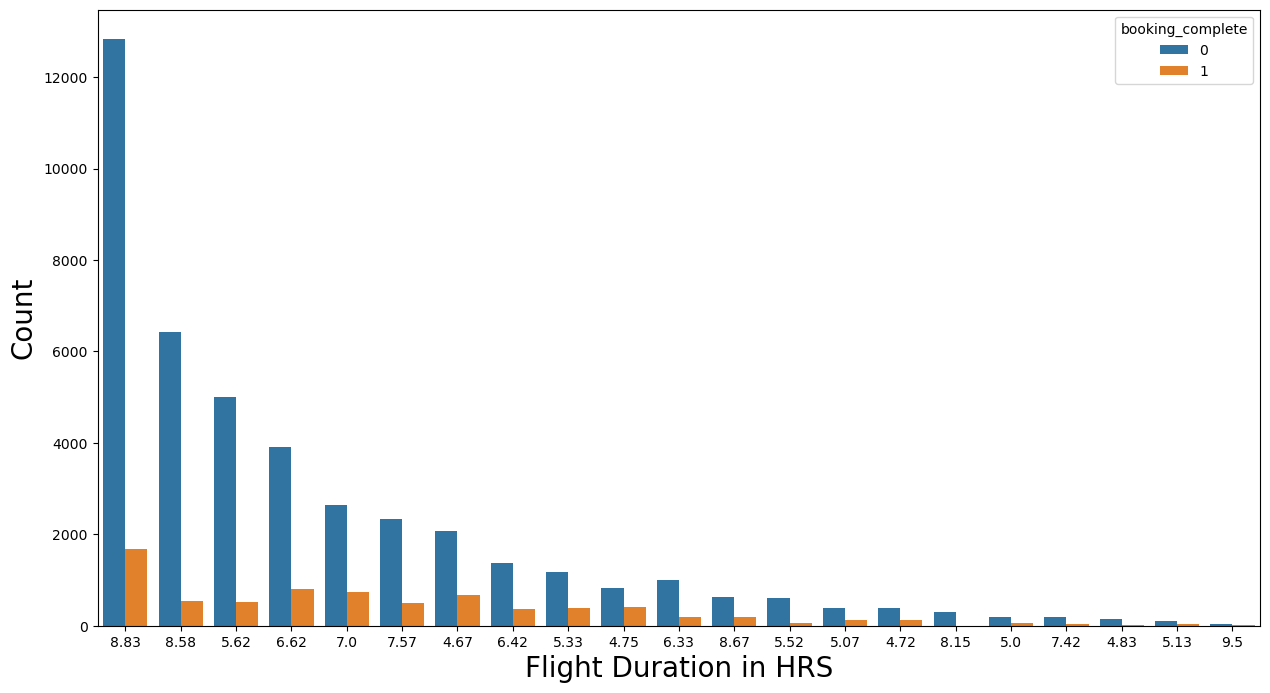

In [ ]:
# Flight hour and booking complete
plt.figure(figsize=(15,8))
plots = sns.countplot(x="flight_duration", hue="booking_complete" , data=booking ,order=booking.flight_duration.value_counts().index)#.iloc[-10:].index)
plt.xlabel("Flight Duration in HRS",fontsize= 20)
plt.ylabel("Count", fontsize= 20)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_smote,y_smote, test_size=0.25,random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(63783, 918)
(21261, 918)
(63783,)
(21261,)


In [ ]:
# using random forest classifier
rforest = RandomForestClassifier()
rforest.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_predtrain = rforest.predict(x_train)
y_predtest = rforest.predict(x_test)

In [ ]:
print(confusion_matrix(y_train, y_predtrain))
print(confusion_matrix(y_test, y_predtest))

[[31888     4]
 [    5 31886]]
[[10011   619]
 [ 1127  9504]]


In [ ]:
print(classification_report(y_train, y_predtrain))
print(classification_report(y_test, y_predtest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31892
           1       1.00      1.00      1.00     31891

    accuracy                           1.00     63783
   macro avg       1.00      1.00      1.00     63783
weighted avg       1.00      1.00      1.00     63783

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     10630
           1       0.94      0.89      0.92     10631

    accuracy                           0.92     21261
   macro avg       0.92      0.92      0.92     21261
weighted avg       0.92      0.92      0.92     21261



In [ ]:
print(accuracy_score(y_train, y_predtrain))
print(accuracy_score(y_test, y_predtest))

0.9998588965711867
0.9178778044306477


In [ ]:
accuracy = cross_val_score(rforest, x_train, y_train, cv=10)

In [ ]:
accuracy

array([0.91675811, 0.91738517, 0.92177457, 0.91298213, 0.91815616,
       0.91596112, 0.92505488, 0.91737222, 0.91784258, 0.91784258])